In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/ML_Final/

/content/gdrive/MyDrive/ML_Final


In [18]:
# Vishakha Dixit
# 801265288
# CNN for Image Classification

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.activations import relu,softmax
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

In [19]:
%cd /content/gdrive/MyDrive/ML_Final/ML_Final
dir1 = ('BrainTumor/Training')
category = []


for file in os.listdir(dir1):
    category.append(file)
    
    
for i in category:
    file_path = os.path.join(dir1,i)
    
    for file in os.listdir(file_path):
        img_path = os.path.join(file_path,file)
        image = cv2.imread(img_path)

/content/gdrive/MyDrive/ML_Final/ML_Final


(512, 512, 3)


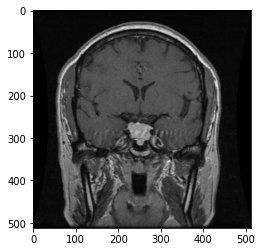

In [20]:
plt.imshow(image)
print(image.shape)

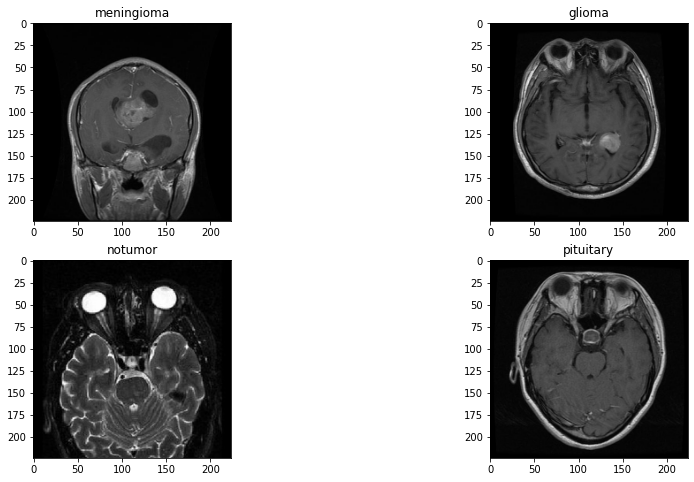

In [21]:
plt.figure(figsize=(15,8))

img_path = ['/glioma/Tr-glTr_0001.jpg','/meningioma/Tr-meTr_0001.jpg','/notumor/Tr-noTr_0001.jpg','/pituitary/Tr-piTr_0001.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(dir1 + img_path[i])
    img = cv2.resize(img, (224, 224))
    plt.imshow(img)
    plt.title(category[i])

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0.2,
                                    zoom_range = 0.3,
                                    width_shift_range=0.2,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


test_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory('BrainTumor/Training',target_size=(200,200),class_mode='categorical',batch_size=32,color_mode='grayscale')
test=test_datagen.flow_from_directory('BrainTumor/Testing',target_size=(200,200),class_mode='categorical',batch_size=32,color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [23]:
model = Sequential()

#layer 1
model.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#layer 2
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#layer 3
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#layer 4
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

 #layer 5
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#layer 6
model.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units= 1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, activation='softmax'))

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 200, 200, 64)      3200      
                                                                 
 batch_normalization_6 (Batc  (None, 200, 200, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 100, 100, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 128)     401536    
                                                                 
 batch_normalization_7 (Batc  (None, 100, 100, 128)    512       
 hNormalization)                                                 
                                                      

In [25]:
model_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 10, verbose = 1)

history = model.fit(train, epochs=100, validation_data=test,callbacks=model_es)

Epoch 1/100
179/179 [==============================] - 50s 273ms/step - loss: 1.5899 - categorical_accuracy: 0.5242 - val_loss: 2.9970 - val_categorical_accuracy: 0.3089
Epoch 2/100
179/179 [==============================] - 49s 271ms/step - loss: 1.0422 - categorical_accuracy: 0.6134 - val_loss: 2.0061 - val_categorical_accuracy: 0.2754
Epoch 3/100
179/179 [==============================] - 49s 274ms/step - loss: 0.7708 - categorical_accuracy: 0.6956 - val_loss: 2.4841 - val_categorical_accuracy: 0.4035
Epoch 4/100
179/179 [==============================] - 51s 285ms/step - loss: 0.6936 - categorical_accuracy: 0.7358 - val_loss: 2.4637 - val_categorical_accuracy: 0.3829
Epoch 5/100
179/179 [==============================] - 49s 273ms/step - loss: 0.6406 - categorical_accuracy: 0.7600 - val_loss: 5.7421 - val_categorical_accuracy: 0.3089
Epoch 6/100
179/179 [==============================] - 48s 270ms/step - loss: 0.5965 - categorical_accuracy: 0.7796 - val_loss: 1.8064 - val_categoric

In [26]:
model.save('BrainTumorCNNmodel.h5')

Text(0.5, 1.0, 'Loss')

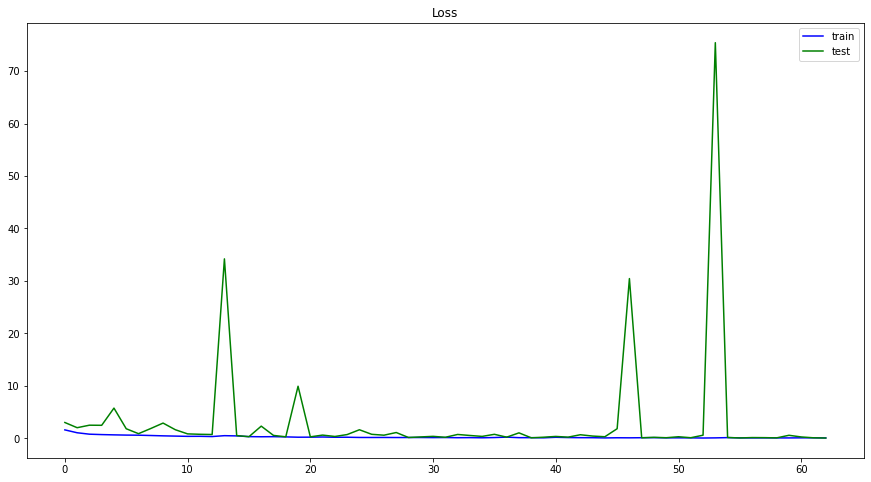

In [27]:
plt.figure(figsize=(15,8))
plt.plot(history.history["loss"],c = "blue")
plt.plot(history.history["val_loss"],c = "green")
plt.legend(["train", "test"])
plt.title('Loss')

Text(0.5, 1.0, 'Accuracy')

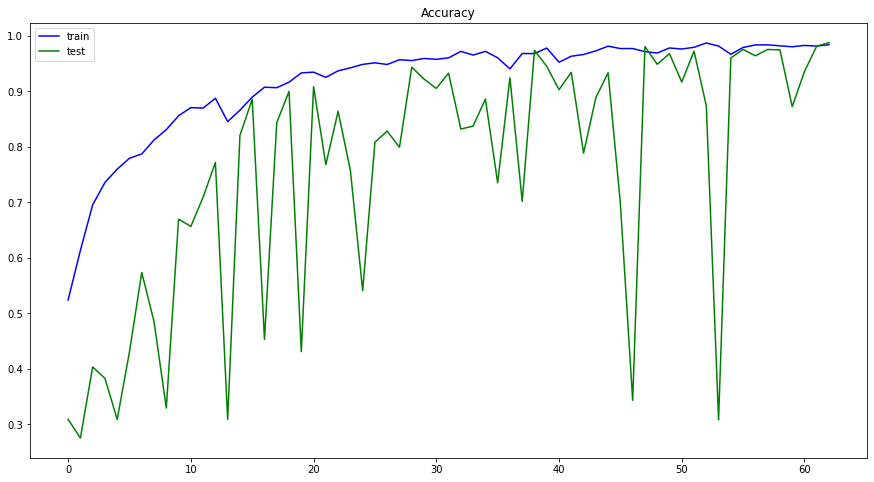

In [28]:
plt.figure(figsize=(15,8))
plt.plot(history.history["categorical_accuracy"],c = "blue")
plt.plot(history.history["val_categorical_accuracy"],c = "green")
plt.legend(["train", "test"])
plt.title('Accuracy')